In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
## Part 1
## 1

# Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [4]:
#Frequency Tables:

#Generate a frequency table for the product category. Which are the top 5 most listed product categories?

category_counts = df['category'].value_counts()
category_counts

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [5]:
## answer: Sports and Outdoors, Beauty, Handmade Clothing, Shoes & Accessories.

top_5_categories = category_counts.head(5)
print(top_5_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


In [26]:
# 2.  Visualizations: Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

# Plot the distribution of product categories
#plt.figure(figsize=(12, 6))
#category_counts.plot(kind='bar')
#plt.title('Distribution of Product Categories on Amazon UK')
#plt.xlabel('Category')
#plt.ylabel('Number of Listings')
#plt.xticks(rotation=90)

Text(0, 0.5, '')

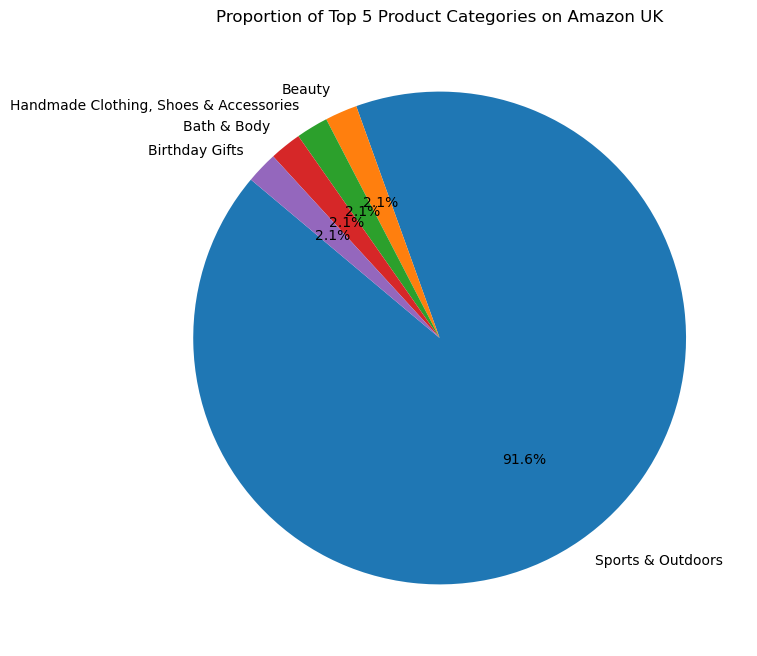

In [7]:
# Plot a pie chart for the top 5 product categories
plt.figure(figsize=(8, 8))
top_5_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Top 5 Product Categories on Amazon UK')
plt.ylabel('')

In [8]:
# Part 2: Delving into Product Pricing
#Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

#Measures of Centrality:

#Calculate the mean, median, and mode for the price of products.
#What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [9]:
# Convert the price column to numeric, forcing errors to NaN (in case there are non-numeric values)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with NaN prices
df = df.dropna(subset=['price'])

In [10]:
# Calculate mean
mean_price = df['price'].mean()

# Calculate median
median_price = df['price'].median()

# Calculate mode
mode_price = df['price'].mode()[0]

# Print the results
print(f"Mean Price: £{mean_price:.2f}")
print(f"Median Price: £{median_price:.2f}")
print(f"Mode Price: £{mode_price:.2f}")

Mean Price: £89.24
Median Price: £19.09
Mode Price: £9.99


In [11]:
## By analyzing these measures, businesses can better understand the common price points and ranges, helping them to position their products more competitively. 

In [12]:
#part 2 number 2

# Convert the price column to numeric, forcing errors to NaN (in case there are non-numeric values)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with NaN prices
df = df.dropna(subset=['price'])

In [13]:
# Calculate variance
variance_price = df['price'].var()

# Calculate standard deviation
std_dev_price = df['price'].std()

# Calculate range
range_price = df['price'].max() - df['price'].min()

# Calculate interquartile range (IQR)
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr_price = q3 - q1

# Print the results
print(f"Variance: £{variance_price:.2f}")
print(f"Standard Deviation: £{std_dev_price:.2f}")
print(f"Range: £{range_price:.2f}")
print(f"Interquartile Range (IQR): £{iqr_price:.2f}")


Variance: £119445.49
Standard Deviation: £345.61
Range: £100000.00
Interquartile Range (IQR): £36.00


In [14]:
## Variance and Standard Deviation: If these values are high, it indicates that product prices are widely spread around the mean. This suggests a significant variation in how products are priced.
## Range: A large range indicates a wide spread between the cheapest and most expensive products.
## IQR: A large IQR indicates that there is considerable variability in the central 50% of the prices. This can suggest a diverse set of products in terms of pricing.

In [15]:
##By analyzing these measures of dispersion, we gain insights into the variability and spread of product prices on Amazon UK, which can help businesses understand pricing dynamics and identify potential pricing strategies. 

In [16]:
#Visualizations:

#Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

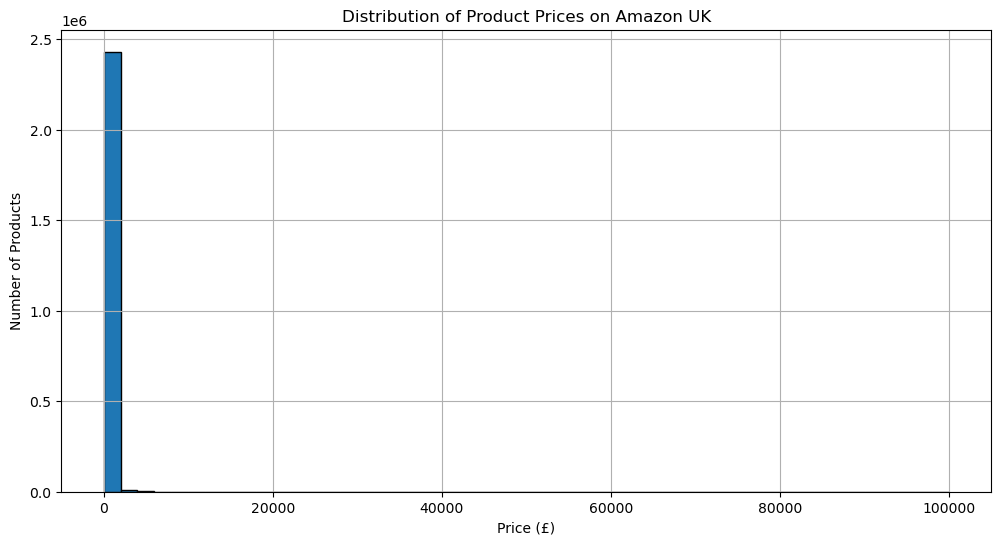

In [17]:
# Plot histogram for product prices
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Distribution of Product Prices on Amazon UK')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()

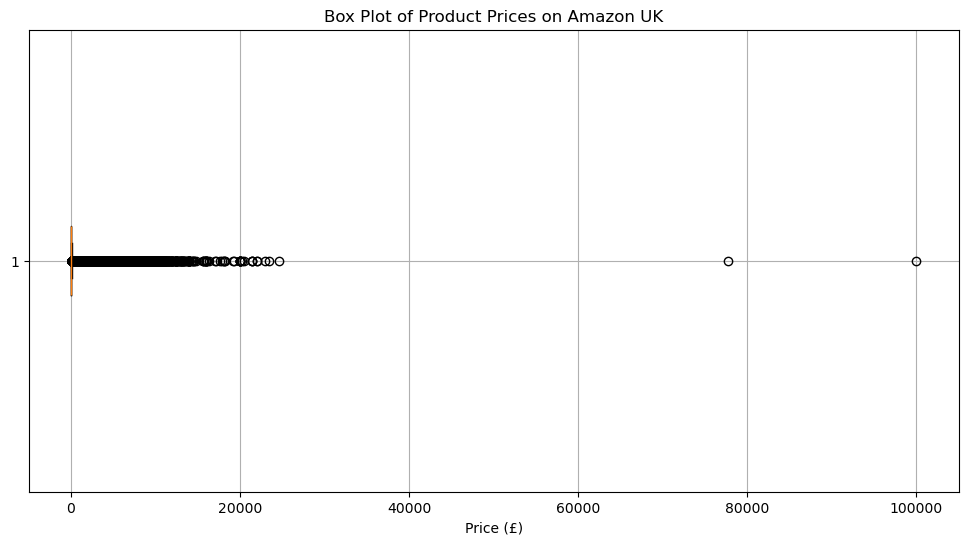

In [18]:
# Plot box plot for product prices
plt.figure(figsize=(12, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Box Plot of Product Prices on Amazon UK')
plt.xlabel('Price (£)')
plt.grid(True)
plt.show()


In [19]:
##By analyzing these visualizations, we can gain insights into common price ranges and identify products that are priced significantly higher than the rest, which could indicate premium products or potential pricing errors. 

In [20]:
##PART 3

In [21]:
# Convert the rating column to numeric, forcing errors to NaN (in case there are non-numeric values)
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Drop rows with NaN ratings
df = df.dropna(subset=['stars'])


In [22]:
# Calculate mean
mean_rating = df['stars'].mean()

# Calculate median
median_rating = df['stars'].median()

# Calculate mode
mode_rating = df['stars'].mode()[0]

# Print the results
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")
print(f"Mode Rating: {mode_rating:.2f}")


Mean Rating: 2.15
Median Rating: 0.00
Mode Rating: 0.00


In [23]:
# Calculate variance
variance_rating = df['stars'].var()

# Calculate standard deviation
std_dev_rating = df['stars'].std()

# Calculate interquartile range (IQR)
q1_rating = df['stars'].quantile(0.25)
q3_rating = df['stars'].quantile(0.75)
iqr_rating = q3_rating - q1_rating

# Print the results
print(f"Variance: {variance_rating:.2f}")
print(f"Standard Deviation: {std_dev_rating:.2f}")
print(f"Interquartile Range (IQR): {iqr_rating:.2f}")


Variance: 4.82
Standard Deviation: 2.19
Interquartile Range (IQR): 4.40


In [24]:
from scipy.stats import skew, kurtosis

# Calculate skewness
skewness_rating = skew(df['stars'])

# Calculate kurtosis
kurtosis_rating = kurtosis(df['stars'])

# Print the results
print(f"Skewness: {skewness_rating:.2f}")
print(f"Kurtosis: {kurtosis_rating:.2f}")


Skewness: 0.08
Kurtosis: -1.93


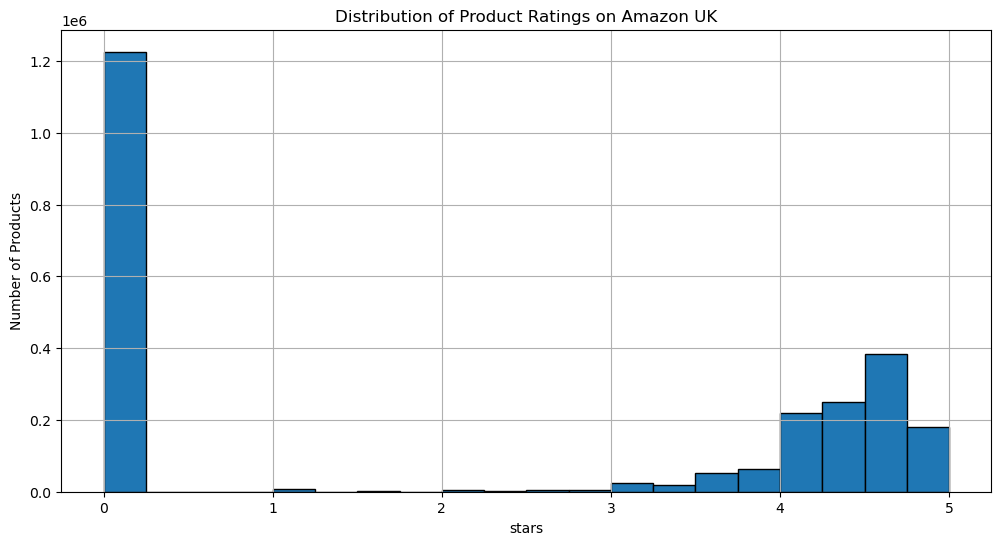

In [25]:
import matplotlib.pyplot as plt

# Plot histogram for product ratings
plt.figure(figsize=(12, 6))
plt.hist(df['stars'], bins=20, edgecolor='black')
plt.title('Distribution of Product Ratings on Amazon UK')
plt.xlabel('stars')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()
